# PyTorch workflow fundamentals

## Import libraries

In [32]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.2.0


## Create custom data with known parameters

### Let us assume w as 0.9 and b as 0.2. We shall create features and labels based on these parameters and check if the Linear Regression models can estimate them accurately

In [33]:
w = 0.9
b = 0.2

X = torch.arange(-2,2,0.02)
y = (w*X) + b

print(X.shape, y.shape)

torch.Size([200]) torch.Size([200])


## Split the data into train set and test set

In [34]:
split_percent = int(len(X)*0.8)

X_train = X[:split_percent]
y_train = y[:split_percent]

X_test = X[split_percent:]
y_test = y[split_percent:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

torch.Size([160]) torch.Size([160]) torch.Size([40]) torch.Size([40])


## Plot predictions

In [35]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

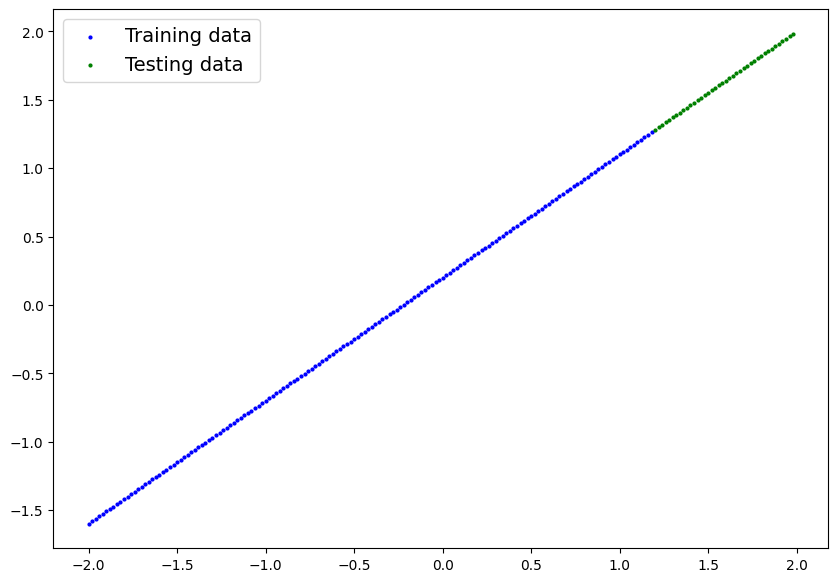

In [36]:
plot_predictions()

# Build model

In [37]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [38]:
torch.manual_seed(42)

model = LinearRegressionModel()

# list(model.parameters())

model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [39]:
#Create loss function and optimizer

loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(params=model.parameters(),
                             lr = 0.01)

## Creating an optimizing loop

In [41]:
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    model.train()

    y_pred = model(X_train)

    loss = loss_fn(y_pred,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()

    with torch.inference_mode():
        test_pred = model(X_test)

    test_loss = loss_fn(test_pred,y_test.type(torch.float))

    if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MSE Train Loss: {loss} | MSE Test Loss: {test_loss} ")

Epoch: 0 | MSE Train Loss: 5.585340113611892e-05 | MSE Test Loss: 0.00020589942869264632 
Epoch: 10 | MSE Train Loss: 3.5816447052638978e-06 | MSE Test Loss: 1.2737102224491537e-05 
Epoch: 20 | MSE Train Loss: 4.6590835722781776e-07 | MSE Test Loss: 1.980016804736806e-06 
Epoch: 30 | MSE Train Loss: 1.813926473914762e-06 | MSE Test Loss: 9.80535514827352e-06 
Epoch: 40 | MSE Train Loss: 1.575553824295639e-06 | MSE Test Loss: 7.964140422700439e-06 
Epoch: 50 | MSE Train Loss: 7.451628221133433e-07 | MSE Test Loss: 3.2861244108062238e-06 
Epoch: 60 | MSE Train Loss: 2.2232697460822237e-07 | MSE Test Loss: 9.256885959985084e-07 
Epoch: 70 | MSE Train Loss: 3.5466435122089024e-08 | MSE Test Loss: 1.5299060862616898e-07 
Epoch: 80 | MSE Train Loss: 7.789028311222523e-10 | MSE Test Loss: 1.674314020760903e-09 
Epoch: 90 | MSE Train Loss: 1.5830238231373528e-09 | MSE Test Loss: 1.0190984944813408e-08 


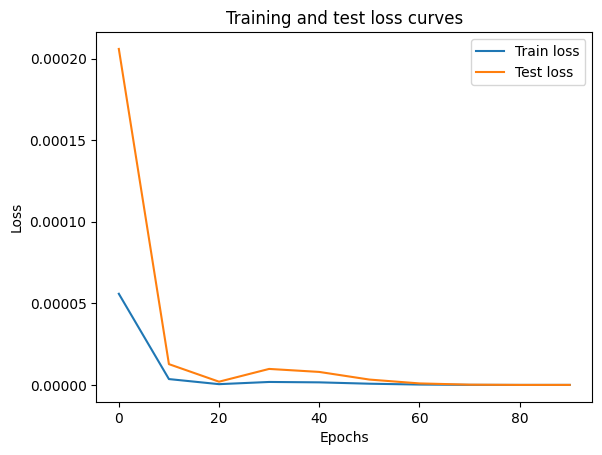

In [42]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [43]:
model.state_dict()

OrderedDict([('weights', tensor([0.8999])), ('bias', tensor([0.2000]))])

The original parameters are 0.9 and 0.2

Our model got very close to calculating the exact original values for weight and bias

# Inference

In [45]:
model.eval()

with torch.inference_mode():
    y_preds = model(X_test)

y_preds

tensor([1.2799, 1.2979, 1.3159, 1.3339, 1.3519, 1.3699, 1.3879, 1.4059, 1.4239,
        1.4419, 1.4599, 1.4779, 1.4959, 1.5139, 1.5319, 1.5499, 1.5679, 1.5859,
        1.6039, 1.6219, 1.6399, 1.6579, 1.6759, 1.6939, 1.7119, 1.7299, 1.7479,
        1.7659, 1.7839, 1.8019, 1.8199, 1.8379, 1.8559, 1.8739, 1.8919, 1.9099,
        1.9279, 1.9459, 1.9639, 1.9819])

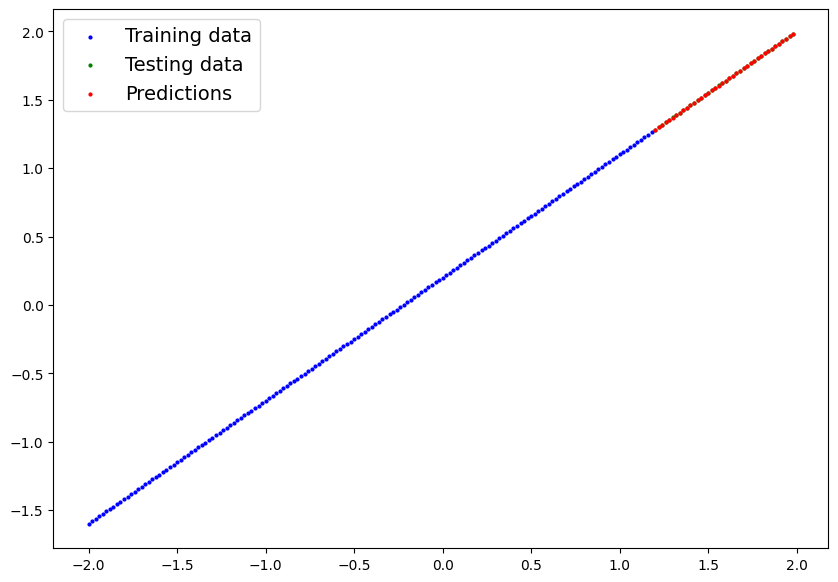

In [46]:
plot_predictions(predictions=y_preds)

# Save model

In [47]:
from pathlib import Path

# Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path 
MODEL_NAME = "pytorch_workflow_fundamentals_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/pytorch_workflow_fundamentals_model.pth


# Load model

In [48]:
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>